## Reading WKT and plotting with Pyplot

In [17]:
import pandas as pd
import numpy as np
from shapely.wkt import loads
from matplotlib.patches import Polygon, Patch

# decartes package makes plotting with holes much easier
from descartes.patch import PolygonPatch

import matplotlib.pyplot as plt

df = pd.read_csv('../../input/train_wkt_v3.csv')
df.head()

,ImageId,ClassType,MultipolygonWKT
0,6040_2_2,1,MULTIPOLYGON EMPTY
1,6040_2_2,2,MULTIPOLYGON EMPTY
2,6040_2_2,3,MULTIPOLYGON EMPTY
3,6040_2_2,4,MULTIPOLYGON (((0.003025 -0.007879000000000001...
4,6040_2_2,5,MULTIPOLYGON (((0.005311 -0.009044999999999999...


In [18]:
# Use just first image
polygonsList = {}
image = df[df.ImageId == '6100_1_3']
for cType in image.ClassType.unique():
    polygonsList[cType] = loads(image[image.ClassType == cType].MultipolygonWKT.values[0])

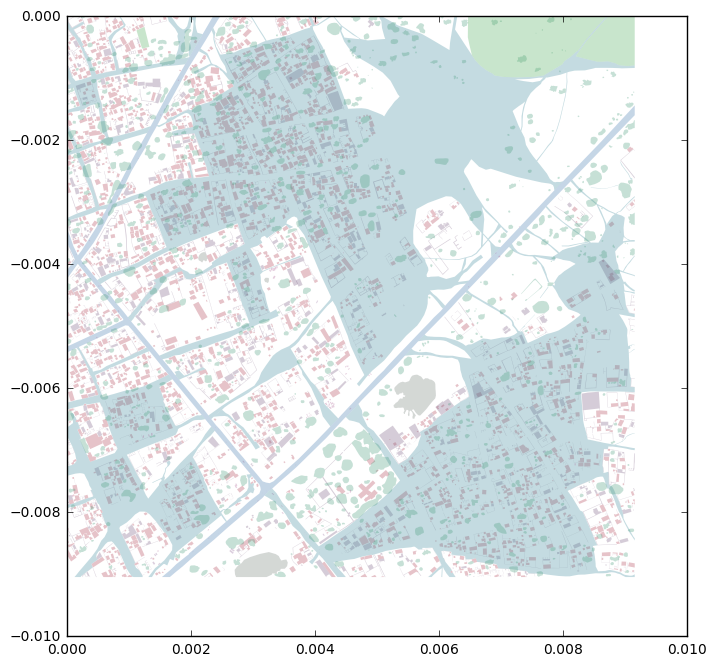

In [21]:
# plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 8))

# plotting, color by class type
for p in polygonsList:
    for polygon in polygonsList[p]:
        mpl_poly = Polygon(np.array(polygon.exterior), color=plt.cm.Set1(p*10), lw=0, alpha=0.3)
        ax.add_patch(mpl_poly)

ax.relim()
ax.autoscale_view()

In [22]:
# number of objects on the image by type
'''
1. Buildings
2. Misc. Manmade structures 
3. Road 
4. Track - poor/dirt/cart track, footpath/trail
5. Trees - woodland, hedgerows, groups of trees, standalone trees
6. Crops - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops
7. Waterway 
8. Standing water
9. Vehicle Large - large vehicle (e.g. lorry, truck,bus), logistics vehicle
10. Vehicle Small - small vehicle (car, van), motorbike
'''
for p in polygonsList:
    print("Type: {:4d}, objects: {}".format(p,len(polygonsList[p].geoms)))

Type:    1, objects: 2208
Type:    2, objects: 1578
Type:    3, objects: 1
Type:    4, objects: 11
Type:    5, objects: 823
Type:    6, objects: 3
Type:    7, objects: 0
Type:    8, objects: 4
Type:    9, objects: 11
Type:   10, objects: 129


## Exploring available dataset

Let's look at all available images and see how many objects of which type are there, what is there areas and how these vary from image to image.

In [ ]:
# number of images in available kernel dataset?
df.ImageId.unique()

In [ ]:
# convert to shapely, get geometries and pivot
df['polygons'] = df.apply(lambda row: loads(row.MultipolygonWKT),axis=1)
df['nPolygons'] = df.apply(lambda row: len(row['polygons'].geoms),axis=1)

pvt = df.pivot(index='ImageId', columns='ClassType', values='nPolygons')
pvt

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_aspect('equal')
plt.imshow(pvt.T, interpolation='nearest', cmap=plt.cm.Blues, extent=[0,22,10,1])
plt.yticks(np.arange(1, 11, 1.0))
plt.title('Number of objects by type')
plt.ylabel('Class Type')
plt.xlabel('Image')
plt.colorbar()
plt.show()

Numbers-wise trees are leading by far, being the only major object type on some of the images. They are followed by buildings and other man structures, which are actually not present on every image, as well as vehicles. Waterways are present on only one image, which actually was added in v2 of WKT file, added after the first version of this kernel was published. 

Visually there also appears to be a correlation between the number of trees and buildings/structures.

In [ ]:
from scipy.stats import pearsonr
print("Trees vs Buildings: {:5.4f}".format(pearsonr(pvt[1],pvt[5])[0]))
print("Trees vs Buildings and Structures: {:5.4f}".format(pearsonr(pvt[1]+pvt[2],pvt[5])[0]))

Indeed there is a medium strength negative correlation, which however may be specific to the given training dataset.

## Plot all images

There are 22 images in train_wkt_v2.csv file.

In [ ]:
for im in df.ImageId.unique():
    image = df[df.ImageId == im]
    for cType in image.ClassType.unique():
        polygonsList[cType] = loads(image[image.ClassType == cType].MultipolygonWKT.values[0])
    
    # plot using matplotlib
    fig, ax = plt.subplots(figsize=(8, 8))

    # plotting, color by class type
    for p in polygonsList:
        for polygon in polygonsList[p]:
            mpl_poly = Polygon(np.array(polygon.exterior), color=plt.cm.Set1(p*10), lw=0, alpha=0.3)
            ax.add_patch(mpl_poly)

    ax.relim()
    ax.autoscale_view()
    plt.show()